In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


# Import Libraries

In [2]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split 
from sklearn.ensemble import RandomForestRegressor
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error 
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import median_absolute_error
from sklearn.preprocessing import MinMaxScaler

# Read train_data and test_data

In [3]:
train_data=pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')
test_data=pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv')

# Show 5 frist row of data

In [4]:
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# Show data_info

In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

# Show data contain null data

In [6]:
train_data.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

# Show data contain duplicate data

In [7]:
train_data.duplicated().sum()

0

# Show data describe

In [8]:
train_data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


# Show data corr

In [9]:
train_data.corr()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.010601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050298,-0.005024,...,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.010601,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,...,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.033226,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,-0.028365,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,0.012609,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,-0.012713,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,-0.021998,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,-0.050298,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,...,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,-0.005024,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420


# Display data corr

<AxesSubplot:>

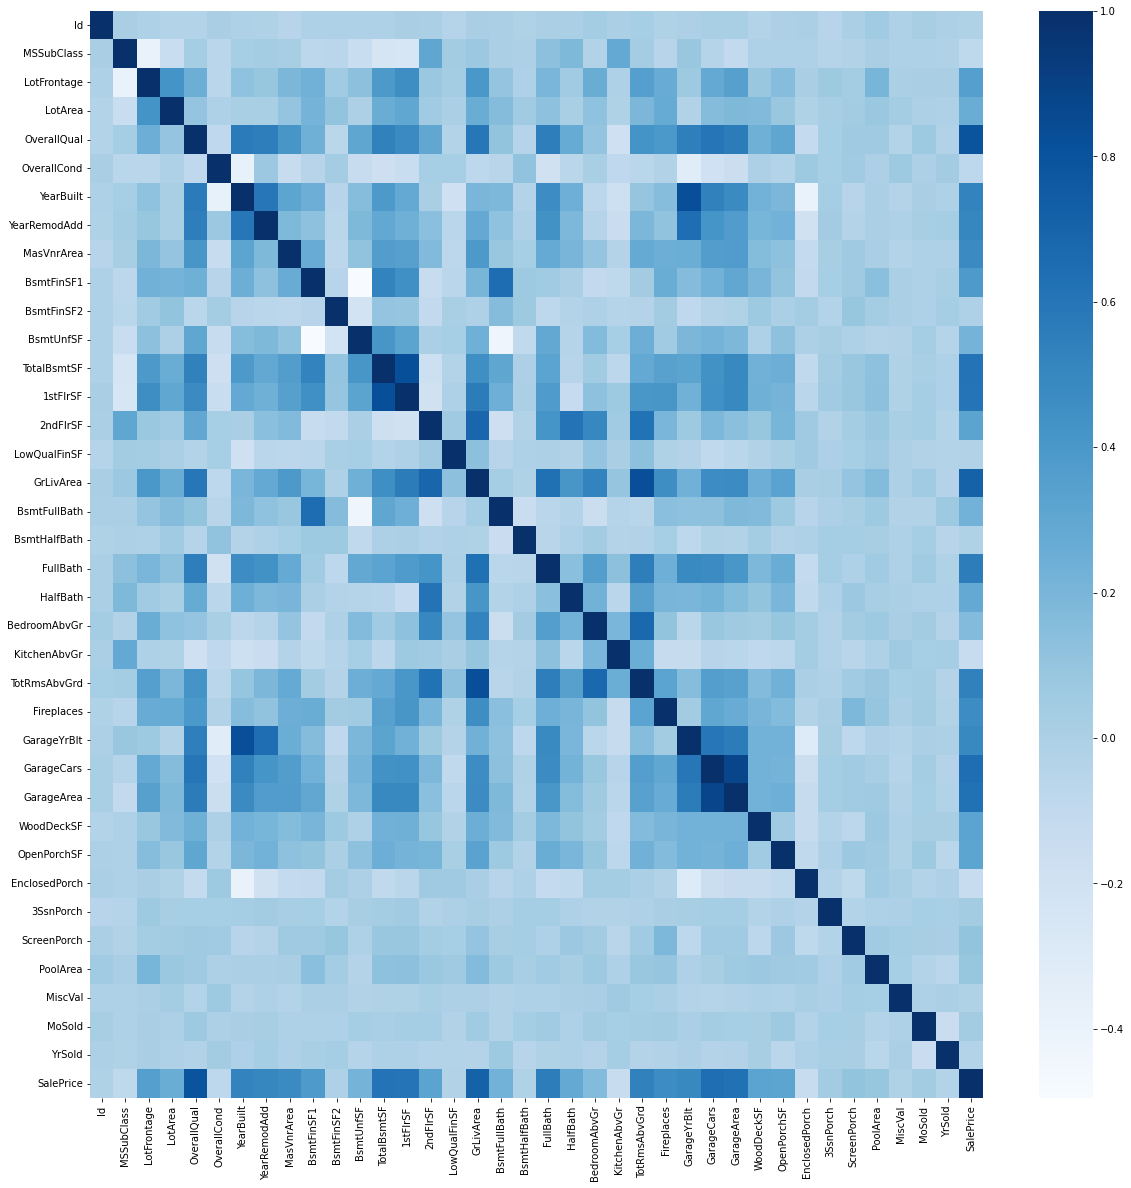

In [10]:
plt.figure(figsize=(20,20))
sns.heatmap(train_data.corr(),cmap = 'Blues')

# Show corr between data and SalePrice

In [11]:
cor = pd.DataFrame(train_data.corr()["SalePrice"])
cor

,SalePrice
Id,-0.021917
MSSubClass,-0.084284
LotFrontage,0.351799
LotArea,0.263843
OverallQual,0.790982
OverallCond,-0.077856
YearBuilt,0.522897
YearRemodAdd,0.507101
MasVnrArea,0.477493
BsmtFinSF1,0.386420


# Checking Null Values

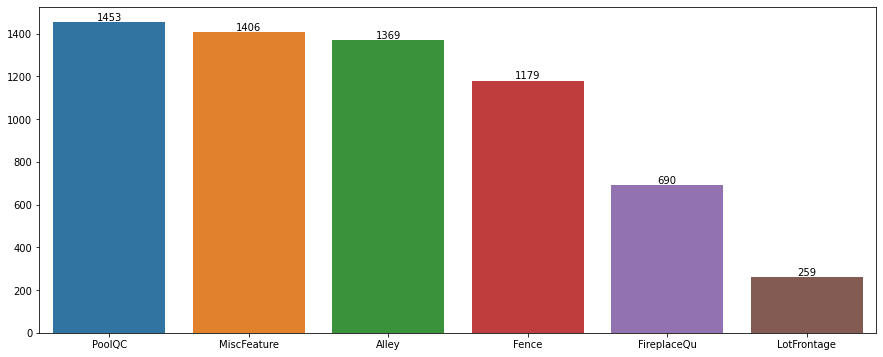

In [12]:
plt.figure(figsize = (15,6))
ax = sns.barplot(x = train_data.isnull().sum().sort_values(
    ascending = False)[0:6].index, y = train_data.isnull().sum().sort_values(ascending = False)[0:6].values,)
for bars in ax.containers:
    ax.bar_label(bars)

# creating a table that includes variables with having null values.

In [13]:
na_vars = train_data.isnull().sum()[train_data.isnull().sum() > 0].sort_values(ascending = False)
na_vars

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtExposure      38
BsmtFinType2      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
Electrical         1
dtype: int64

# creating a dataframe that includes variables, nulls and their percentages.

In [14]:
nas = pd.DataFrame(na_vars)
nas["Percent"] = (na_vars.values / len(train_data) * 100)
nas.columns = ["Nulls", "Percent"]
nas

,Nulls,Percent
PoolQC,1453,99.520548
MiscFeature,1406,96.301370
Alley,1369,93.767123
Fence,1179,80.753425
FireplaceQu,690,47.260274
LotFrontage,259,17.739726
GarageType,81,5.547945
GarageYrBlt,81,5.547945
GarageFinish,81,5.547945
GarageQual,81,5.547945


# drop columns contain null data

In [15]:
id=test_data["Id"]
train_data.drop(["Id","PoolQC", "MiscFeature", "Alley", "Fence", "FireplaceQu","GarageType", "GarageFinish", "GarageCond",
        "BsmtExposure", "BsmtFinType2", "BsmtCond", "BsmtFinType1",'LotFrontage','GarageYrBlt','GarageQual','BsmtQual'], axis = 1, inplace = True)
test_data.drop(["Id","PoolQC", "MiscFeature", "Alley", "Fence", "FireplaceQu","GarageType", "GarageFinish", "GarageCond",
        "BsmtExposure", "BsmtFinType2", "BsmtCond", "BsmtFinType1",'LotFrontage','GarageYrBlt','GarageQual','BsmtQual'], axis = 1, inplace = True)

In [16]:
na_vars = train_data.isnull().sum()[train_data.isnull().sum() > 0].sort_values(ascending = False)
nas = pd.DataFrame(na_vars)
nas["Percent"] = (na_vars.values / len(train_data) * 100)
nas.columns = ["Nulls", "Percent"]
nas

,Nulls,Percent
MasVnrType,8,0.547945
MasVnrArea,8,0.547945
Electrical,1,0.068493


# Show object column

In [17]:
string_col=train_data.select_dtypes(include='object').columns
pd.DataFrame(string_col,columns=['object column'])

,object column
0,MSZoning
1,Street
2,LotShape
3,LandContour
4,Utilities
5,LotConfig
6,LandSlope
7,Neighborhood
8,Condition1
9,Condition2


# Show input X and output y

In [18]:
X=train_data.iloc[:,:-1]
y=train_data.iloc[:,-1]
keys=X.keys()

# Show input X

In [19]:
X

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,...,61,0,0,0,0,0,2,2008,WD,Normal
1,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,...,0,0,0,0,0,0,5,2007,WD,Normal
2,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,...,42,0,0,0,0,0,9,2008,WD,Normal
3,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,...,35,272,0,0,0,0,2,2006,WD,Abnorml
4,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,...,84,0,0,0,0,0,12,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,...,40,0,0,0,0,0,8,2007,WD,Normal
1456,20,RL,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,...,0,0,0,0,0,0,2,2010,WD,Normal
1457,70,RL,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,...,60,0,0,0,0,2500,5,2010,WD,Normal
1458,20,RL,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,...,0,112,0,0,0,0,4,2010,WD,Normal


# Show output y

In [20]:
y

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

# transform object data

In [21]:
label=LabelEncoder()
for i in string_col:
    X[i]=label.fit_transform(X[i])
    test_data[i]=label.fit_transform(test_data[i])
X    

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,3,8450,1,3,3,0,4,0,5,...,61,0,0,0,0,0,2,2008,8,4
1,20,3,9600,1,3,3,0,2,0,24,...,0,0,0,0,0,0,5,2007,8,4
2,60,3,11250,1,0,3,0,4,0,5,...,42,0,0,0,0,0,9,2008,8,4
3,70,3,9550,1,0,3,0,0,0,6,...,35,272,0,0,0,0,2,2006,8,0
4,60,3,14260,1,0,3,0,2,0,15,...,84,0,0,0,0,0,12,2008,8,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,3,7917,1,3,3,0,4,0,8,...,40,0,0,0,0,0,8,2007,8,4
1456,20,3,13175,1,3,3,0,4,0,14,...,0,0,0,0,0,0,2,2010,8,4
1457,70,3,9042,1,3,3,0,4,0,6,...,60,0,0,0,0,2500,5,2010,8,4
1458,20,3,9717,1,3,3,0,4,0,12,...,0,112,0,0,0,0,4,2010,8,4


# impute null data

In [22]:
impute=SimpleImputer(missing_values=np.nan, strategy="mean")
X=impute.fit_transform(X)
test_data=impute.fit_transform(test_data)
pd.DataFrame(X,columns=keys)

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60.0,3.0,8450.0,1.0,3.0,3.0,0.0,4.0,0.0,5.0,...,61.0,0.0,0.0,0.0,0.0,0.0,2.0,2008.0,8.0,4.0
1,20.0,3.0,9600.0,1.0,3.0,3.0,0.0,2.0,0.0,24.0,...,0.0,0.0,0.0,0.0,0.0,0.0,5.0,2007.0,8.0,4.0
2,60.0,3.0,11250.0,1.0,0.0,3.0,0.0,4.0,0.0,5.0,...,42.0,0.0,0.0,0.0,0.0,0.0,9.0,2008.0,8.0,4.0
3,70.0,3.0,9550.0,1.0,0.0,3.0,0.0,0.0,0.0,6.0,...,35.0,272.0,0.0,0.0,0.0,0.0,2.0,2006.0,8.0,0.0
4,60.0,3.0,14260.0,1.0,0.0,3.0,0.0,2.0,0.0,15.0,...,84.0,0.0,0.0,0.0,0.0,0.0,12.0,2008.0,8.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60.0,3.0,7917.0,1.0,3.0,3.0,0.0,4.0,0.0,8.0,...,40.0,0.0,0.0,0.0,0.0,0.0,8.0,2007.0,8.0,4.0
1456,20.0,3.0,13175.0,1.0,3.0,3.0,0.0,4.0,0.0,14.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2010.0,8.0,4.0
1457,70.0,3.0,9042.0,1.0,3.0,3.0,0.0,4.0,0.0,6.0,...,60.0,0.0,0.0,0.0,0.0,2500.0,5.0,2010.0,8.0,4.0
1458,20.0,3.0,9717.0,1.0,3.0,3.0,0.0,4.0,0.0,12.0,...,0.0,112.0,0.0,0.0,0.0,0.0,4.0,2010.0,8.0,4.0


# MinMaxScaler for Data

In [23]:
scaler = MinMaxScaler(copy=True, feature_range=(0, 1))
X = scaler.fit_transform(X)
test_data=scaler.fit_transform(test_data)
print('X \n' , X[:10])
print('y \n' , y[:10])

X 
 [[0.23529412 0.75       0.0334198  1.         1.         1.
  0.         1.         0.         0.20833333 0.25       0.28571429
  0.         0.71428571 0.66666667 0.5        0.94927536 0.88333333
  0.2        0.14285714 0.85714286 0.86666667 0.25       0.1225
  0.66666667 1.         0.4        0.12508859 0.         0.06421233
  0.1400982  0.2        0.         1.         0.8        0.11977972
  0.41355932 0.         0.25923135 0.33333333 0.         0.66666667
  0.5        0.375      0.33333333 0.66666667 0.5        1.
  0.         0.5        0.3864598  1.         0.         0.11151737
  0.         0.         0.         0.         0.         0.09090909
  0.5        1.         0.8       ]
 [0.         0.75       0.03879502 1.         1.         1.
  0.         0.5        0.         1.         0.125      0.28571429
  0.         0.28571429 0.55555556 0.875      0.75362319 0.43333333
  0.2        0.14285714 0.57142857 0.53333333 0.5        0.
  1.         1.         0.2        0.1732813

# Splitting data

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=44, shuffle =True)
print('X_train shape is ' , X_train.shape)
print('X_test shape is ' , X_test.shape)
print('y_train shape is ' , y_train.shape)
print('y_test shape is ' , y_test.shape)

X_train shape is  (1095, 63)
X_test shape is  (365, 63)
y_train shape is  (1095,)
y_test shape is  (365,)


# Applying Linear Regression Model 

In [25]:
LinearRegressionModel = LinearRegression(fit_intercept=True, normalize=True,copy_X=True,n_jobs=-1)
LinearRegressionModel.fit(X_train, y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,


LinearRegression(n_jobs=-1, normalize=True)

# Calculating Details

In [26]:
print('Linear Regression Train Score is : ' , LinearRegressionModel.score(X_train, y_train))
print('Linear Regression Test Score is : ' , LinearRegressionModel.score(X_test, y_test))
print('Linear Regression Coef is : ' , LinearRegressionModel.coef_)
print('Linear Regression intercept is : ' , LinearRegressionModel.intercept_)

Linear Regression Train Score is :  0.8331650015548355
Linear Regression Test Score is :  0.8475420385761836
Linear Regression Coef is :  [-1.37616006e+04 -5.25669497e+03  2.63546646e+04  4.34840289e+03
 -3.54541618e+03  1.49512454e+04 -6.50590426e+04 -3.74834725e+02
  1.89393127e+04  9.24290743e+03 -7.31945814e+03 -1.30936601e+05
 -1.21321137e+04 -9.51801154e+03  1.12414573e+05  3.89124466e+04
  3.84651797e+04  2.15176907e+03  1.04027644e+04  4.22914272e+04
 -8.38537833e+03  2.10721584e+03  3.06829579e+04  7.25803439e+04
 -3.16875740e+04  5.35341969e+03 -1.42050928e+03  3.00640349e+17
  7.85159239e+16  1.24432292e+17 -3.25462887e+17 -1.70555560e+04
 -3.51444648e+03 -2.70540788e+03 -2.71494097e+03  7.02233239e+17
  3.32747049e+17  9.21701268e+16 -8.55312995e+17  2.98296688e+04
  7.13221392e+03  1.08783211e+04 -2.06436551e+03 -3.80421294e+04
 -4.63747949e+04 -3.31465500e+04  4.29378177e+04  2.22131342e+04
  1.56455901e+04  6.87201967e+04 -3.30479528e+04  1.37012447e+03
  1.78598941e+04 

# Applying Random Forest Regressor Model 

In [27]:
RandomForestRegressorModel = RandomForestRegressor(n_estimators=100,max_depth=10, random_state=33)
RandomForestRegressorModel.fit(X_train, y_train)

RandomForestRegressor(max_depth=10, random_state=33)

# Calculating Details

In [28]:
print('Random Forest Regressor Train Score is : ' , RandomForestRegressorModel.score(X_train, y_train))
print('Random Forest Regressor Test Score is : ' , RandomForestRegressorModel.score(X_test, y_test))
print('Random Forest Regressor No. of features are : ' , RandomForestRegressorModel.n_features_)
print('Random Forest Regressor features importances are : ' ,RandomForestRegressorModel.feature_importances_)

Random Forest Regressor Train Score is :  0.9785017685371699
Random Forest Regressor Test Score is :  0.8630397112548358
Random Forest Regressor No. of features are :  63
Random Forest Regressor features importances are :  [2.04129016e-03 3.15402918e-03 1.70499097e-02 2.54017153e-06
 2.46982231e-03 1.87342482e-03 3.69222318e-09 1.14699875e-03
 3.62778997e-04 9.82611934e-03 5.22144224e-04 6.40827370e-04
 4.41454973e-04 9.52570761e-04 5.90642026e-01 2.91500576e-03
 1.12221187e-02 1.00385715e-02 8.27269354e-04 6.55927910e-04
 1.14952299e-03 1.22305698e-03 1.56527857e-03 9.21477567e-03
 4.20821006e-03 6.39717958e-04 3.24069527e-04 2.06607691e-02
 6.89007924e-04 4.74202336e-03 3.11139097e-02 4.09358872e-05
 1.10628558e-03 4.00416844e-03 1.35773096e-04 2.07917196e-02
 3.85526860e-02 4.43639025e-05 1.18971488e-01 7.90984432e-04
 9.58486092e-05 6.34817225e-03 8.51429896e-04 1.18210112e-03
 2.13431215e-04 5.46378852e-03 6.11474480e-03 5.59663186e-04
 5.23516471e-03 1.90442407e-02 1.62559885e-02

/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:103: FutureWarning: Attribute `n_features_` was deprecated in version 1.0 and will be removed in 1.2. Use `n_features_in_` instead.
  warnings.warn(msg, category=FutureWarning)


# Applying DecisionTreeRegressor Model 

In [29]:
DecisionTreeRegressorModel = DecisionTreeRegressor( max_depth=10,random_state=33)
DecisionTreeRegressorModel.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=10, random_state=33)

# Calculating Details

In [30]:
print('DecisionTreeRegressor Train Score is : ' , DecisionTreeRegressorModel.score(X_train, y_train))
print('DecisionTreeRegressor Test Score is : ' , DecisionTreeRegressorModel.score(X_test, y_test))

DecisionTreeRegressor Train Score is :  0.9871740246709351
DecisionTreeRegressor Test Score is :  0.7541472060403065


# Show RandomForestRegressorModel.feature_importances_

<BarContainer object of 63 artists>

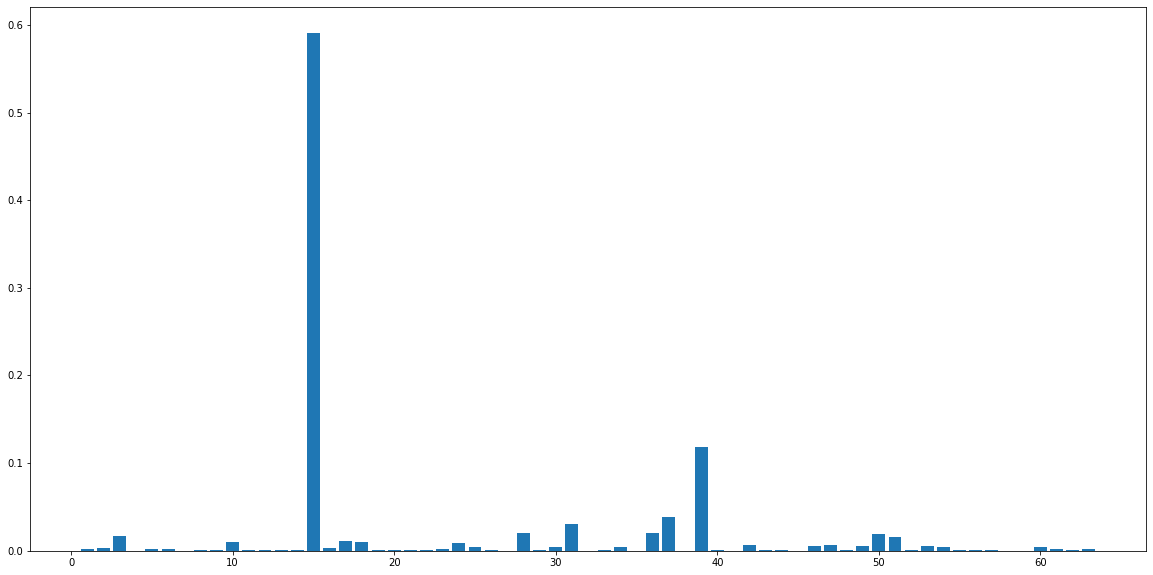

In [31]:
x_bar=list(range(1,64))
plt.figure(figsize=(20,10))
plt.bar(x_bar,RandomForestRegressorModel.feature_importances_)

# Calculating Prediction

In [32]:
y_pred = RandomForestRegressorModel.predict(X_test)
print('Predicted Value for Random Forest Regressor is : ' , y_pred[:10])

Predicted Value for Random Forest Regressor is :  [127034.47945074 148511.32792772 316588.94055411 128818.01583857
 148268.34185054 147126.08081176 143260.78746747 171760.41228888
 165173.245217   222263.86190347]


# Calculating Mean Absolute Error

In [33]:
MAEValue = mean_absolute_error(y_test, y_pred, multioutput='uniform_average') # it can be raw_values
print('Mean Absolute Error Value is : ', MAEValue)

Mean Absolute Error Value is :  17252.022225003322


# Calculating Mean Squared Error

In [34]:
MSEValue = mean_squared_error(y_test, y_pred, multioutput='uniform_average') # it can be raw_values
print('Mean Squared Error Value is : ', MSEValue)

Mean Squared Error Value is :  787994628.9760876


# Calculating Median Absolute Error

In [35]:
MdSEValue = median_absolute_error(y_test, y_pred)
print('Median Absolute Error Value is : ', MdSEValue )

Median Absolute Error Value is :  10894.471611642803


In [36]:
submission=RandomForestRegressorModel.predict(test_data)
submission=pd.DataFrame(submission,columns=['SalePrice'],index=id)
submission.to_csv('/kaggle/working/pred.csv')
submission

,SalePrice
Id,
1461,139893.860610
1462,154482.552413
1463,192043.873944
1464,200171.684888
1465,209337.432856
...,...
2915,104326.240425
2916,105076.786985
2917,163274.991846
